# Preprocessing Spaceship Titanic dataset

##### In this notebook, we preprocess both the training and test datasets 
##### so that the test set has the same features as the training set used for model training.
##### We will use the test set for predictions and submission to Kaggle.

In [1179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Pipelines
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

import gender

In [1180]:
test_set = pd.read_csv('../source_data/test.csv')
test_set

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [1181]:
# Checking missing values and their percentage in the dataset
# mv - missing values
test = pd.DataFrame({
    'Feature': test_set.columns,
    'Missing Values': test_set.isna().sum().values,
})
test['Ratio'] = round((test['Missing Values'] / len(test_set)) * 100, 2)
test

,Feature,Missing Values,Ratio
0,PassengerId,0,0.00
1,HomePlanet,87,2.03
2,CryoSleep,93,2.17
3,Cabin,100,2.34
4,Destination,92,2.15
5,Age,91,2.13
6,VIP,93,2.17
7,RoomService,82,1.92
8,FoodCourt,106,2.48
9,ShoppingMall,98,2.29


In [1182]:
data = pd.read_csv('../source_data/train.csv')
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [1183]:
# Converting target column from boolean to int
data['Transported'] = data['Transported'].astype(int)
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0


In [1184]:
# Checking missing values and their percentage in the dataset
# mv - missing values
mv_data = pd.DataFrame({
    'Feature': data.columns,
    'Missing Values': data.isna().sum().values,
})
mv_data['Ratio'] = round((mv_data['Missing Values'] / len(data)) * 100, 2)
mv_data

,Feature,Missing Values,Ratio
0,PassengerId,0,0.00
1,HomePlanet,201,2.31
2,CryoSleep,217,2.50
3,Cabin,199,2.29
4,Destination,182,2.09
5,Age,179,2.06
6,VIP,203,2.34
7,RoomService,181,2.08
8,FoodCourt,183,2.11
9,ShoppingMall,208,2.39


In [1185]:
mv_data_test_set = pd.DataFrame({
    'Feature': test_set.columns,
    'Missing Values': test_set.isna().sum().values,
})
mv_data_test_set['Ratio'] = round((mv_data_test_set['Missing Values'] / len(data)) * 100, 2)
mv_data_test_set

,Feature,Missing Values,Ratio
0,PassengerId,0,0.00
1,HomePlanet,87,1.00
2,CryoSleep,93,1.07
3,Cabin,100,1.15
4,Destination,92,1.06
5,Age,91,1.05
6,VIP,93,1.07
7,RoomService,82,0.94
8,FoodCourt,106,1.22
9,ShoppingMall,98,1.13


#### Step 1 - Filling the missing values in the `HomePlanet` feature
##### Criterion: if the passengers are in the same cabin and at least one of them has a `HomePlanet` value

---



In [1186]:
training_set = data
training_set

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0


In [1187]:
# Distribution of the passenger by HomePlanet
home_planet = training_set['HomePlanet'].value_counts(dropna=False).to_frame('count').assign(
    **{'ratio': lambda x: round(x['count'] / x['count'].sum() * 100, 2)}
)
home_planet

,count,ratio
HomePlanet,,
Earth,4602,52.94
Europa,2131,24.51
Mars,1759,20.23
NaN,201,2.31


In [1188]:
# Distribution of the passenger by HomePlanet
home_planet_ts = test_set['HomePlanet'].value_counts(dropna=False).to_frame('count').assign(
    **{'ratio': lambda x: round(x['count'] / x['count'].sum() * 100, 2)}
)
home_planet_ts

,count,ratio
HomePlanet,,
Earth,2263,52.91
Europa,1002,23.43
Mars,925,21.63
NaN,87,2.03


In [1189]:
# Select all duplicated Cabin values
# We want to find all passengers who share the same cabin,
# as they are most likely from the same HomePlanet.
duplicates = training_set[training_set['Cabin'].duplicated(keep=False)]
duplicates

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,1
10,0008_02,Europa,True,B/1/P,TRAPPIST-1e,34.0,False,0.0,0.0,NaN,0.0,0.0,Altardr Flatic,1
11,0008_03,Europa,False,B/1/P,55 Cancri e,45.0,False,39.0,7295.0,589.0,110.0,124.0,Wezena Flatic,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8685,9275_01,Europa,False,A/97/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Polaton Conable,1
8686,9275_02,Europa,False,A/97/P,TRAPPIST-1e,32.0,False,1.0,1146.0,0.0,50.0,34.0,Diram Conable,0
8687,9275_03,Europa,NaN,A/97/P,TRAPPIST-1e,30.0,False,0.0,3208.0,0.0,2.0,330.0,Atlasym Conable,1
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0


In [1190]:
duplicates_ts = test_set[test_set['Cabin'].duplicated(keep=False)]
duplicates_ts

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
7,0032_01,Europa,True,D/0/S,TRAPPIST-1e,20.0,False,0.0,0.0,0.0,0.0,0.0,Acrabi Pringry
8,0032_02,Europa,True,D/0/S,55 Cancri e,23.0,False,0.0,0.0,0.0,0.0,0.0,Dhena Pringry
11,0040_01,Europa,False,D/2/P,TRAPPIST-1e,45.0,False,932.0,74.0,NaN,7.0,1010.0,Antino Pinoffent
12,0040_02,Europa,False,D/2/P,TRAPPIST-1e,44.0,False,0.0,1561.0,0.0,14.0,224.0,Jihda Pinoffent
15,0046_02,Earth,False,F/11/P,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,903.0,NaN,Glene Powery
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4256,9238_03,Earth,True,G/1501/P,TRAPPIST-1e,16.0,False,0.0,0.0,0.0,0.0,0.0,Herina Emenez
4257,9238_04,Earth,False,G/1501/P,TRAPPIST-1e,26.0,False,882.0,2.0,0.0,0.0,0.0,Marlie Emenez
4258,9238_05,Earth,True,NaN,TRAPPIST-1e,14.0,False,0.0,0.0,0.0,0.0,0.0,Caseye Emenez
4259,9238_06,Earth,False,G/1501/P,55 Cancri e,0.0,False,0.0,0.0,0.0,0.0,0.0,Blance Garnettiz


In [1191]:
# Check all NaN HomePlanet values
# We want to see all passengers missing a HomePlanet value
duplicates[duplicates['HomePlanet'].isna()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
113,0119_01,NaN,False,A/0/P,TRAPPIST-1e,39.0,False,0.0,2344.0,0.0,65.0,6898.0,Batan Coning,0
438,0470_02,NaN,True,F/86/S,TRAPPIST-1e,36.0,False,0.0,0.0,0.0,0.0,0.0,Jurs Binie,1
471,0504_06,NaN,True,B/19/S,55 Cancri e,53.0,False,0.0,0.0,0.0,0.0,0.0,Alheneb Unpasine,1
501,0539_03,NaN,True,C/18/P,55 Cancri e,30.0,False,0.0,0.0,0.0,0.0,0.0,Alderak Nalanet,1
505,0540_02,NaN,False,F/95/S,TRAPPIST-1e,17.0,False,1471.0,0.0,0.0,45.0,16.0,Rantax Conie,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8251,8816_02,NaN,True,B/340/S,55 Cancri e,44.0,False,0.0,0.0,0.0,0.0,0.0,Mesatik Diouselt,1
8295,8860_02,NaN,True,F/1825/P,TRAPPIST-1e,7.0,False,0.0,0.0,0.0,0.0,0.0,Guls Vloaf,1
8353,8938_01,NaN,True,F/1729/S,TRAPPIST-1e,22.0,False,0.0,0.0,0.0,0.0,0.0,Quites Must,1
8489,9072_01,NaN,True,F/1758/S,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,0.0,0.0,Gork Creke,1


In [1192]:
duplicates_ts[duplicates_ts['HomePlanet'].isna()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
535,1124_02,NaN,True,C/44/S,TRAPPIST-1e,22.0,False,0.0,0.0,0.0,0.0,0.0,Keidhma Dighty
573,1184_02,NaN,False,C/46/S,55 Cancri e,55.0,False,0.0,156.0,0.0,NaN,361.0,Dyonif Peraket
712,1471_02,NaN,True,G/226/S,TRAPPIST-1e,1.0,False,0.0,0.0,0.0,0.0,0.0,Weney Morez
737,1502_01,NaN,False,C/54/P,55 Cancri e,25.0,False,0.0,170.0,1.0,601.0,7470.0,Acraban Foraud
763,1553_02,NaN,False,F/302/S,TRAPPIST-1e,36.0,False,1093.0,0.0,1566.0,0.0,0.0,Golos Hacle
899,1862_02,NaN,False,G/304/P,55 Cancri e,35.0,False,557.0,0.0,0.0,393.0,0.0,Joanry Bardsey
991,2057_01,NaN,True,G/332/P,PSO J318.5-22,6.0,False,0.0,NaN,0.0,0.0,0.0,Carold Carley
1063,2245_01,NaN,True,A/17/P,55 Cancri e,43.0,False,0.0,0.0,0.0,0.0,0.0,Propent Hyling
1105,2344_01,NaN,False,B/70/P,55 Cancri e,52.0,False,0.0,142.0,0.0,378.0,3209.0,Bellus Belstrut
1160,2430_03,NaN,False,G/394/S,NaN,19.0,False,785.0,0.0,0.0,0.0,0.0,Ronia Mcphernard


In [1193]:
# Add HomePlanet for passengers who share the same cabin
import importlib
import functions.add_home_planet
importlib.reload(functions.add_home_planet)
from functions.add_home_planet import add_home_planet, add_home_planet_test_set

In [1194]:
pipeline_train = Pipeline([
    ('HomePlanet', FunctionTransformer(add_home_planet))
])

pipeline_test = Pipeline([
    ('HomePlanetTestSet', FunctionTransformer(add_home_planet_test_set))
])

training_set = pipeline_train.fit_transform(training_set)
test_set = pipeline_test.fit_transform(test_set)

In [1195]:
# Checking missing values after adding HomePlanet for records where it is logically applicable
training_set['HomePlanet'].isna().sum()

np.int64(148)

In [1196]:
# Test set HomePlanet ratio
test_set['HomePlanet'].value_counts()

HomePlanet
Earth     2264
Europa    1005
Mars       926
Name: count, dtype: int64

In [1197]:
# Filling the Nan values in the HomePlanet feature in Test set
planet_ratios_ts = {
    'Earth': 2264,
    'Europa': 1005,
    'Mars': 926
}

planets = list(planet_ratios_ts.keys())
weights = np.array(list(planet_ratios_ts.values()))
weights = weights / weights.sum()

missing_mask = test_set['HomePlanet'].isna()

test_set.loc[missing_mask, 'HomePlanet'] = np.random.choice(
    planets,
    size=missing_mask.sum(),
    p=weights
)
test_set['HomePlanet'].isna().sum()

np.int64(0)

In [1198]:
planet_ratios = {
    'Earth': 52.94,
    'Europa': 24.51,
    'Mars': 20.23
}

In [1199]:
# Finding the rows with missing values
mask = training_set['HomePlanet'].isna()
n_missing = mask.sum()

In [1200]:
# Calculate how many rows for every planet we need to fill
counts_to_fill = (
    (pd.Series(planet_ratios) / 100 * n_missing)
    .round()
    .astype(int)
)
counts_to_fill

Earth     78
Europa    36
Mars      30
dtype: int64

In [1201]:
# Generate list with the planets depends on distribution
fill_values = np.concatenate([
    [planet] * count for planet, count in counts_to_fill.items()
])

In [1202]:
# if due to rounding there are missing or extra values — adjust accordingly
diff = n_missing - len(fill_values)
if diff > 0:
    fill_values = np.append(fill_values, np.random.choice(list(planet_ratios.keys()), diff))
elif diff < 0:
    fill_values = fill_values[:diff]

In [1203]:
np.random.shuffle(fill_values)

In [1204]:
training_set.loc[mask, 'HomePlanet'] = fill_values

In [1205]:
training_set['HomePlanet'].isna().sum()

np.int64(0)

### Handling Duplicate Cabins and Missing `HomePlanet` Values

In this step, we extracted all cabins that have duplicates.  
Then, from this list, we filtered out all records where the `HomePlanet` value is missing.  
After that, we manually checked each passenger ID.  
If two or more passengers share the same cabin and one of them has a missing `HomePlanet` value,  
we assigned the same value from the other passenger(s) in that cabin.  

This is a more reliable approach for filling the missing values.

#### Step 2 - Filling the missing values in the `CryoSleep` feature
##### Criterion: According to the percentage distribution of non-missing values grouped by HomePlanet

---



In [1206]:
training_set

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0


In [1207]:
test_set

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


#### We will explore the data and look for an approach to fill the missing values

In [1208]:
# We split the dataset into two parts – the first part contains data with no missing values for CryoSleep, 
# and the second part contains data with missing values for CryoSleep.
not_missing_cryo = training_set[training_set['CryoSleep'].notna()]
missing_cryo_sleep = training_set[training_set['CryoSleep'].isna()]

not_missing_cryo_test_set = test_set[test_set['CryoSleep'].notna()]
missing_cryo_sleep_test_set = test_set[test_set['CryoSleep'].isna()]

In [1209]:
not_missing_cryo

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0


In [1210]:
not_missing_cryo_test_set

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [1211]:
# Displaying the ratio and distribution of not missing CryoSleep values
not_missing_cryo['HomePlanet'].value_counts().to_frame('count').assign(
    **{'ratio': lambda x: round(x['count'] / x['count'].sum() * 100, 2)}
)

,count,ratio
HomePlanet,,
Earth,4581,54.05
Europa,2130,25.13
Mars,1765,20.82


In [1212]:
not_missing_cryo_test_set['HomePlanet'].value_counts().to_frame('count').assign(
    **{'ratio': lambda x: round(x['count'] / x['count'].sum() * 100, 2)}
)

,count,ratio
HomePlanet,,
Earth,2257,53.94
Europa,1002,23.95
Mars,925,22.11


In [1213]:
# The distribution of passengers who are in CryoSleep and those who are not, grouped by HomePlanet. 
# The goal is to maintain this ratio in order to fill in the missing values for the CryoSleep feature.
cryo_sleep_passengers_group_by_planet = (
    not_missing_cryo
    .groupby(['HomePlanet', 'CryoSleep'])
    .size()
    .to_frame('count')
    .assign(
        ratio=lambda x: round(x['count'] / x.groupby(level=0)['count'].transform('sum') * 100, 2)
    )
)

cryo_sleep_passengers_group_by_planet

count  ratio
HomePlanet CryoSleep              
Earth      False       3164  69.07
           True        1417  30.93
Europa     False       1196  56.15
           True         934  43.85
Mars       False       1079  61.13
           True         686  38.87

In [1214]:
cryo_sleep_passengers_group_by_planet_test_set = (
    not_missing_cryo_test_set
    .groupby(['HomePlanet', 'CryoSleep'])
    .size()
    .to_frame('count')
    .assign(
        ratio=lambda x: round(x['count'] / x.groupby(level=0)['count'].transform('sum') * 100, 2)
    )
)

cryo_sleep_passengers_group_by_planet_test_set

count  ratio
HomePlanet CryoSleep              
Earth      False       1552  68.76
           True         705  31.24
Europa     False        532  53.09
           True         470  46.91
Mars       False        556  60.11
           True         369  39.89

In [1215]:
missing_cryo_sleep

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
92,0099_02,Earth,NaN,G/12/P,TRAPPIST-1e,2.0,False,0.0,0.0,0.0,0.0,0.0,Thewis Connelson,1
98,0105_01,Earth,NaN,F/21/P,TRAPPIST-1e,27.0,False,0.0,0.0,570.0,2.0,131.0,Carry Cleachrand,0
104,0110_02,Europa,NaN,B/5/P,TRAPPIST-1e,40.0,False,0.0,331.0,0.0,0.0,1687.0,Aldeba Bootious,0
111,0115_01,Mars,NaN,F/24/P,TRAPPIST-1e,26.0,False,0.0,0.0,0.0,0.0,NaN,Rohs Pead,1
152,0173_01,Earth,NaN,E/11/S,TRAPPIST-1e,58.0,False,0.0,985.0,0.0,5.0,0.0,Hilip Grifford,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8620,9197_01,Europa,NaN,C/308/P,55 Cancri e,44.0,False,0.0,0.0,0.0,0.0,0.0,Bellus Platch,1
8651,9227_05,Earth,NaN,G/1498/P,TRAPPIST-1e,8.0,False,0.0,0.0,0.0,0.0,0.0,Hard Hinglendez,0
8664,9246_01,Earth,NaN,G/1490/S,TRAPPIST-1e,32.0,False,0.0,0.0,0.0,0.0,0.0,NaN,1
8675,9259_01,Earth,NaN,F/1893/P,TRAPPIST-1e,44.0,False,1030.0,1015.0,0.0,11.0,NaN,Annah Gilleyons,1


In [1216]:
missing_cryo_sleep_test_set

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
68,0156_01,Mars,NaN,F/34/P,TRAPPIST-1e,NaN,False,0.0,0.0,0.0,0.0,0.0,Tures Upead
78,0175_02,Earth,NaN,G/25/P,55 Cancri e,8.0,False,0.0,0.0,0.0,0.0,0.0,Elody Benney
92,0208_01,Earth,NaN,G/33/P,TRAPPIST-1e,40.0,False,44.0,0.0,565.0,0.0,18.0,Mael Vales
99,0227_01,Earth,NaN,NaN,TRAPPIST-1e,22.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Buckentry
165,0349_01,Europa,NaN,A/4/S,TRAPPIST-1e,33.0,False,0.0,1030.0,0.0,3490.0,5832.0,Meropus Ametic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,8705_01,Mars,NaN,F/1790/P,55 Cancri e,20.0,False,0.0,0.0,0.0,0.0,0.0,Anch Gen
4108,8925_06,Europa,NaN,C/295/P,TRAPPIST-1e,27.0,False,0.0,2182.0,7.0,2582.0,19.0,Zedarga Pabler
4209,9138_01,Europa,NaN,NaN,TRAPPIST-1e,41.0,False,0.0,1998.0,0.0,1023.0,867.0,Misamak Trupistic
4230,9182_01,Earth,NaN,F/1776/S,TRAPPIST-1e,14.0,False,0.0,0.0,NaN,1377.0,29.0,Garyan Gainebergan


In [1217]:
# Displaying the ratio and distribution of missing CryoSleep values grouped by Home Planet
missing_cryo_sleep['HomePlanet'].value_counts().to_frame('count').assign(
    **{'ratio': lambda x: round(x['count'] / x['count'].sum() * 100, 2)}
)

,count,ratio
HomePlanet,,
Earth,115,53.00
Europa,59,27.19
Mars,43,19.82


In [1218]:
missing_cryo_sleep_test_set['HomePlanet'].value_counts().to_frame('count').assign(
    **{'ratio': lambda x: round(x['count'] / x['count'].sum() * 100, 2)}
)

,count,ratio
HomePlanet,,
Earth,50,53.76
Europa,24,25.81
Mars,19,20.43


In [1219]:
ratio_dict = (
    cryo_sleep_passengers_group_by_planet
    .reset_index()
    .pivot(index='HomePlanet', columns='CryoSleep', values='ratio')
    .fillna(0)
)
ratio_dict

CryoSleep,False,True
HomePlanet,,
Earth,69.07,30.93
Europa,56.15,43.85
Mars,61.13,38.87


In [1220]:
def fill_cryo(row):
    if pd.isna(row['CryoSleep']):
        probs = ratio_dict.loc[row['HomePlanet']] / 100
        return np.random.choice([False, True], p=[probs[False], probs[True]])
    return row['CryoSleep']

training_set['CryoSleep'] = training_set.apply(fill_cryo, axis=1)
test_set['CryoSleep'] = test_set.apply(fill_cryo, axis=1)

In [1221]:
# Checking for missing values
training_set['CryoSleep'].isna().sum()

np.int64(0)

In [1222]:
test_set['CryoSleep'].isna().sum()

np.int64(0)

In [1223]:
# Converting CryoSleep values from boolean to int
training_set['CryoSleep'] = training_set['CryoSleep'].astype(int)
test_set['CryoSleep'] = test_set['CryoSleep'].astype(int)

In [1224]:
training_set

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,0,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0
8689,9278_01,Earth,1,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0
8690,9279_01,Earth,0,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1
8691,9280_01,Europa,0,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0


In [1225]:
test_set

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,1,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,0,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,1,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,0,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,0,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,1,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,0,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,1,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,0,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


#### Step 2 - Filling the missing values in the `Cabine` feature
##### cabin code `deck/num/side`


---

In [1226]:
training_set

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,0,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0
8689,9278_01,Earth,1,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0
8690,9279_01,Earth,0,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1
8691,9280_01,Europa,0,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0


In [1227]:
test_set

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,1,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,0,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,1,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,0,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,0,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,1,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,0,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,1,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,0,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [1228]:
def split_cabin_feature(ds):
    ds['cabin_deck'] = ds['Cabin'].str.split('/').str[0]
    ds['cabin_num'] = ds['Cabin'].str.split('/').str[1]
    ds['cabin_side'] = ds['Cabin'].str.split('/').str[2]
    ds = ds.drop(columns='Cabin')
    
    return ds

training_set = split_cabin_feature(training_set)
test_set = split_cabin_feature(test_set)

In [1229]:
training_set['cabin_deck'].isna().sum()

np.int64(199)

In [1230]:
test_set['cabin_deck'].isna().sum()

np.int64(100)

In [1231]:
def cabin_deck_ratios(planet):
    """
    :param planet: Name of the selected planet
    :return: Dictionary where keys are deck names and 
    values are their percentage ratios for the given planet
    """
    home_planet_cabin = training_set[training_set['HomePlanet'] == planet]
    
    result = home_planet_cabin['cabin_deck'].value_counts(dropna=False).pipe(
    lambda x: x.to_frame('count').assign(ratio=round(x / x.sum() * 100, 2))
    )
    
    return result['ratio'].to_dict()

In [1232]:
list_deck_ratios_by_planets = []
for p in ['Earth', 'Europa', 'Mars']:
    list_deck_ratios_by_planets.append(cabin_deck_ratios(p))

In [1233]:
list_deck_ratios_by_planets_ts = []
for p in ['Earth', 'Europa', 'Mars']:
    list_deck_ratios_by_planets_ts.append(cabin_deck_ratios(p))

In [1234]:
def fill_cabin_deck(dataset, planet, ratios):
    """
    :param dataset: DataFrame (training_set or test_set)
    :param planet: Name of the planet
    :param ratios: Dictionary with deck ratios for the given planet
    """
    mask_planet = dataset['HomePlanet'] == planet
    mask_missing = dataset['cabin_deck'].isna() & mask_planet

    choices = list(ratios.keys())
    weights = np.array(list(ratios.values()))
    weights = weights / weights.sum()

    dataset.loc[mask_missing, 'cabin_deck'] = np.random.choice(
        choices,
        size=mask_missing.sum(),
        p=weights
    )

In [1235]:
rts = {
    'Earth': list_deck_ratios_by_planets[0],
    'Europa': list_deck_ratios_by_planets[1],
    'Mars': list_deck_ratios_by_planets[2]
}

In [1236]:
rts_ts = {
    'Earth': list_deck_ratios_by_planets_ts[0],
    'Europa': list_deck_ratios_by_planets_ts[1],
    'Mars': list_deck_ratios_by_planets_ts[2]
}

In [1237]:
for k, v in rts.items():
    fill_cabin_deck(training_set, k, v)

In [1238]:
for k, v in rts_ts.items():
    fill_cabin_deck(test_set, k, v)

In [1239]:
# Check for missing (NaN) values in the 'cabin_deck' feature
training_set['cabin_deck'].isna().sum()

np.int64(0)

In [1240]:
test_set['cabin_deck'].isna().sum()

np.int64(0)

In [1241]:
training_set

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,cabin_deck,cabin_num,cabin_side
0,0001_01,Europa,0,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,B,0,P
1,0002_01,Earth,0,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,F,0,S
2,0003_01,Europa,0,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,A,0,S
3,0003_02,Europa,0,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,A,0,S
4,0004_01,Earth,0,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,0,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0,A,98,P
8689,9278_01,Earth,1,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0,G,1499,S
8690,9279_01,Earth,0,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1,G,1500,S
8691,9280_01,Europa,0,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0,E,608,S


In [1242]:
test_set

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,cabin_deck,cabin_num,cabin_side
0,0013_01,Earth,1,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,3,S
1,0018_01,Earth,0,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,4,S
2,0019_01,Europa,1,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,0,S
3,0021_01,Europa,0,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,C,1,S
4,0023_01,Earth,0,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,F,5,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,1,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,G,1496,S
4273,9269_01,Earth,0,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,G,NaN,NaN
4274,9271_01,Mars,1,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,D,296,P
4275,9273_01,Europa,0,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,D,297,P


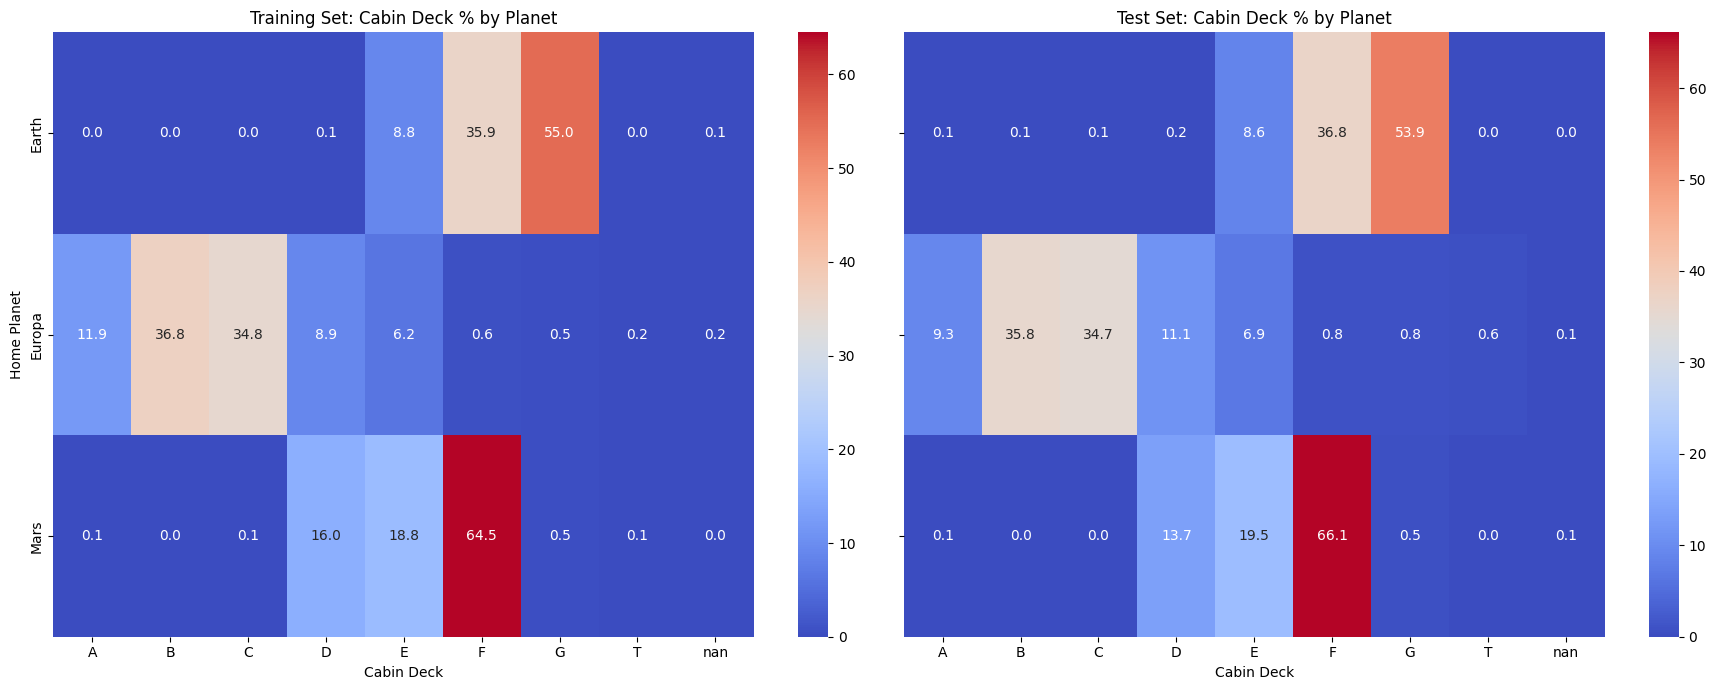

In [1243]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7), sharey=True)

# --- Training set ---
deck_distribution = (
    training_set.groupby(['HomePlanet', 'cabin_deck'])
    .size()
    .unstack(fill_value=0)
)
deck_distribution = deck_distribution.div(deck_distribution.sum(axis=1), axis=0) * 100

sns.heatmap(deck_distribution, annot=True, fmt=".1f", cmap='coolwarm', ax=axes[0])
axes[0].set_title('Training Set: Cabin Deck % by Planet')
axes[0].set_xlabel('Cabin Deck')
axes[0].set_ylabel('Home Planet')

# --- Test set ---
deck_distribution_ts = (
    test_set.groupby(['HomePlanet', 'cabin_deck'])
    .size()
    .unstack(fill_value=0)
)
deck_distribution_ts = deck_distribution_ts.div(deck_distribution_ts.sum(axis=1), axis=0) * 100

sns.heatmap(deck_distribution_ts, annot=True, fmt=".1f", cmap='coolwarm', ax=axes[1])
axes[1].set_title('Test Set: Cabin Deck % by Planet')
axes[1].set_xlabel('Cabin Deck')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

##### These two matrices show the percentage distribution of Decks for each planet.
##### For example, on planet Earth, 55.3% of passengers from this planet are accommodated on Deck G.
##### Here, we can clearly distinguish the inhabitants of the three planets and their distribution across the spaceship.
##### A more detailed analysis of all features will be conducted in the EDA section.

In [1255]:
# Cabin num / Nan values count / Nan values ratio
nan_values_cabin_num = pd.DataFrame({
    'training_set': [training_set['cabin_num'].isna().sum(), 
                     round(training_set['cabin_num'].isna().sum() / len(training_set) * 100, 2)],
    'test_set': [test_set['cabin_num'].isna().sum(), 
                 round(test_set['cabin_num'].isna().sum() / len(test_set) * 100, 2)]
}, index=['Nan values abs', 'Nan Ratio'])

nan_values_cabin_num

,training_set,test_set
Nan values abs,199.00,100.00
Nan Ratio,2.29,2.34


We see an approximately equal ratio of NaN values compared to the other features.
It is possible that the dataset was intentionally designed this way, and the best results will be achieved if the missing values are filled in correctly.
At the moment, the best result we have achieved is a model accuracy of 0.8122 according to the Kaggle evaluation, which corresponds to position 33 out of 1877 at the time of submission.